In [1]:
import gdown

files = {
    'F01.7z': "https://drive.google.com/uc?id=0B4PVUqnGmrJsMXJIekMzMm1ZTzg&export=download",
    "F02.7z": "https://drive.google.com/uc?id=0B4PVUqnGmrJsWnFvZkp5dm5jRTQ&export=download",
    "F04.7z": "https://drive.google.com/u/0/uc?id=0B4PVUqnGmrJsZ1N3azVMa2hFdVE&export=download",
    "F05.7z": "https://drive.google.com/uc?id=0B4PVUqnGmrJsRnN0ZTBGYm91dk0&export=download",
    "F06.7z": "https://drive.google.com/u/0/uc?id=0B4PVUqnGmrJsTHZhS0RubnRmRXc&export=download",
    "F07.7z": "https://drive.google.com/uc?id=0B4PVUqnGmrJsdzBVWUwyLU1fNFE&export=download",
    "F08.7z": "https://drive.google.com/u/0/uc?id=0B4PVUqnGmrJsQVN5ZUpvbkRjRE0&export=download",
    "F09.7z": "https://drive.google.com/u/0/uc?id=0B4PVUqnGmrJscU5nT2otMjdpbTQ&export=download",
    "F10.7z": "https://drive.google.com/uc?id=0B4PVUqnGmrJsM0tHdi10azVvNDQ&export=download",
    "F11.7z": "https://drive.google.com/u/0/uc?id=0B4PVUqnGmrJsaGtldzY4aWFJOGs&export=download",
    "M01.7z": "https://drive.google.com/uc?id=0B4PVUqnGmrJsZHhNZ09UbmE2Rm8&export=download",
    "M02.7z": "https://drive.google.com/uc?id=0B4PVUqnGmrJsM18tOGVEV1d3b00&export=download",
    "M04.7z": "https://drive.google.com/uc?id=0B4PVUqnGmrJsdGQyaGRkb0E2UXM&export=download",
    "M07.7z": "https://drive.google.com/uc?id=0B4PVUqnGmrJsc204ak0yMVBTUkU&export=download",
    "M08.7z": "https://drive.google.com/uc?id=0B4PVUqnGmrJsc2Fyb3BiMm9Rd2c&export=download"
  }

for key in files:
  gdown.download(files[key], key, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=0B4PVUqnGmrJsMXJIekMzMm1ZTzg&export=download
To: /content/F01.7z
266MB [00:02, 104MB/s] 
Downloading...
From: https://drive.google.com/uc?id=0B4PVUqnGmrJsWnFvZkp5dm5jRTQ&export=download
To: /content/F02.7z
328MB [00:03, 97.3MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=0B4PVUqnGmrJsZ1N3azVMa2hFdVE&export=download
To: /content/F04.7z
478MB [00:04, 108MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B4PVUqnGmrJsRnN0ZTBGYm91dk0&export=download
To: /content/F05.7z
377MB [00:10, 35.4MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=0B4PVUqnGmrJsTHZhS0RubnRmRXc&export=download
To: /content/F06.7z
373MB [00:09, 41.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=0B4PVUqnGmrJsdzBVWUwyLU1fNFE&export=download
To: /content/F07.7z
329MB [00:14, 23.4MB/s]
Downloading...
From: https://drive.google.com/u/0/uc?id=0B4PVUqnGmrJsQVN5ZUpvbkRjRE0&export=download
To: /content/F08.7z
335MB [00:10, 31.5MB/s]
Do

In [0]:
!mkdir -p data/miracl

In [3]:
for key in files:
  file = key
  dest = '/data/miracl/' + key.split('.')[0]
  !7z x $key -o$dest


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 265635411 bytes (254 MiB)

Extracting archive: F01.7z
--
Path = F01.7z
Type = 7z
Physical Size = 265635411
Headers Size = 25677
Method = LZMA:24
Solid = +
Blocks = 1

  0%      1%      2% 59 - phrases/05/10/color_001.jpg                                       3% 118 - words/02/09/color_001.jpg                                      3% 119 - words/02/10/color_001.jpg                                      5% 177 - words/08/08/color_001.jpg                  

In [4]:
!ls /data/miracl/F10/words/01/01

color_001.jpg  color_005.jpg  depth_001.png  depth_005.png
color_002.jpg  color_006.jpg  depth_002.png  depth_006.png
color_003.jpg  color_007.jpg  depth_003.png  depth_007.png
color_004.jpg  color_008.jpg  depth_004.png  depth_008.png


In [5]:
from imutils.video import VideoStream
from imutils import face_utils
import datetime
import argparse
import imutils
import time
import dlib
import cv2
import glob
import sys
import os
import shutil 
import math
import numpy as np
from albumentations.augmentations import transforms
import skimage
from tqdm import tqdm

from skimage.transform import resize
from sklearn.model_selection import train_test_split
from scipy import stats as s
import scipy.misc
from PIL import Image


import keras
from keras.models import Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.applications.xception import Xception, preprocess_input
from keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from keras.layers import Dense, InputLayer, Dropout, Flatten, Activation, GRU, Input, Conv3D, MaxPooling3D, GlobalMaxPooling3D, ZeroPadding3D, AveragePooling3D
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D, Convolution2D, ZeroPadding2D, Bidirectional, TimeDistributed, GlobalAveragePooling2D
from keras.layers.recurrent import LSTM
from keras.utils import np_utils
from keras.preprocessing import image, sequence
from keras.callbacks import ModelCheckpoint


#from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import optimizers

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
base_dir = 'data'
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')
#os.makedirs(base_dir)
os.makedirs(train_dir)
os.makedirs(val_dir)
os.makedirs(test_dir)

In [0]:
classes = 'Begin, Choose, Connection, Navigation, Next, Previous, Start, Stop, Hello, Web'
classes = classes.split(', ')

In [0]:
for class_name in classes:
    train_vids_dir = os.path.join(train_dir, class_name)
    val_vids_dir = os.path.join(val_dir, class_name)
    test_vids_dir = os.path.join(test_dir, class_name)
    
    os.makedirs(train_vids_dir)
    os.makedirs(val_vids_dir)
    os.makedirs(test_vids_dir)

In [9]:
!wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
!bzip2 -dk shape_predictor_68_face_landmarks.dat.bz2

--2020-02-08 21:19:33--  http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
Resolving dlib.net (dlib.net)... 107.180.26.78
Connecting to dlib.net (dlib.net)|107.180.26.78|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64040097 (61M)
Saving to: ‘shape_predictor_68_face_landmarks.dat.bz2’

shape_predictor_68_ 100%[===================>]  61.07M  28.0MB/s    in 2.2s    

2020-02-08 21:19:36 (28.0 MB/s) - ‘shape_predictor_68_face_landmarks.dat.bz2’ saved [64040097/64040097]



In [0]:
predictor_path = 'shape_predictor_68_face_landmarks.dat'

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(predictor_path)

In [112]:
img_black = np.zeros((25,50,3))

train_people = 'F01, F02, F04, F05, F06, F07, F08, F09, M01, M02, M04'.split(', ')
val_people = 'F10, M07'.split(', ')
test_people = 'F11, M08'.split(', ')
print(train_people)
print(val_people)
print(test_people)

classes_num = ['0'+str(i) if i < 10 else str(i) for i in range(1, 11) ]
word_ids = ['0'+str(i) if i < 10 else str(i) for i in range(1, 11) ]
classes_dict = dict(zip(classes_num, classes))
print(classes_num)
print(word_ids)
print(classes_dict)

['F01', 'F02', 'F04', 'F05', 'F06', 'F07', 'F08', 'F09', 'M01', 'M02', 'M04']
['F10', 'M07']
['F11', 'M08']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
{'01': 'Begin', '02': 'Choose', '03': 'Connection', '04': 'Navigation', '05': 'Next', '06': 'Previous', '07': 'Start', '08': 'Stop', '09': 'Hello', '10': 'Web'}


In [0]:
def show_img(img, figsize=(8, 8)):
    fig, ax = plt.subplots(figsize=figsize)
    ax.grid(False)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.imshow(img)
    plt.imshow(img)

In [1]:
counter = 0
for classi in classes_num:
    for person in tqdm(train_people):
        for word_id in word_ids:
            for f in sorted(glob.glob(os.path.join('/data/miracl/'+person+'/words/'+classi+'/'+ word_id, "*.jpg"))):
                img = cv2.imread(f, 1)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                rects = detector(gray)
                
                for k, rect in enumerate(rects):
                    shape = predictor(gray, rect)
                    
                    x_51 = shape.part(51).x
                    y_51 = shape.part(51).y
                    x_57 = shape.part(57).x
                    y_57 = shape.part(57).y

                    x1_m = x_51 - 18
                    y1_m = y_51 - 7
                    x2_m = x_57 + 18
                    y2_m = y_57 + 9

                    offset_x_m = (50-(abs(x1_m-x2_m)))/2
                    offset_y_m = (25-(abs(y1_m-y2_m)))/2

                    img = img[int(y1_m-offset_y_m):int(y2_m+offset_y_m), int(x1_m-offset_x_m):int(x2_m+offset_x_m)]
                    skimage.transform.resize(img, (100, 50))
                
                counter += 1
                
                cv2.imwrite('data/train/' 
                            + classes_dict[classi] + '/' 
                            + classi  + '_' 
                            + person  + '_' 
                            + word_id + '_' 
                            + f[29:-4] + '.jpg', img)

NameError: name 'classes_num' is not defined

In [17]:
counter = 0
for classi in classes_num:
    for person in tqdm(val_people):
        for word_id in word_ids:
            for f in sorted(glob.glob(os.path.join('/data/miracl/'+person+'/words/'+classi+'/'+ word_id, "*.jpg"))):
            #for f in sorted(glob.glob(os.path.join('MIRACL/'+person+'/words/'+classi+'/'+ word_id, "*.jpg"))):
                img = cv2.imread(f, 1)
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                rects = detector(gray, 0)
                
                for k, rect in enumerate(rects):
                    shape = predictor(gray, rect)
                    
                    x_51 = shape.part(51).x
                    y_51 = shape.part(51).y
                    x_57 = shape.part(57).x
                    y_57 = shape.part(57).y

                    x1_m = x_51 - 18
                    y1_m = y_51 - 7
                    x2_m = x_57 + 18
                    y2_m = y_57 + 9

                    offset_x_m = (50-(abs(x1_m-x2_m)))/2
                    offset_y_m = (25-(abs(y1_m-y2_m)))/2

                    img = img[int(y1_m-offset_y_m):int(y2_m+offset_y_m), int(x1_m-offset_x_m):int(x2_m+offset_x_m)]

                counter += 1
                
                cv2.imwrite('data/validation/' 
                            + classes_dict[classi] + '/' 
                            + classi  + '_' 
                            + person  + '_' 
                            + word_id + '_' 
                            + f[29:-4] + '.jpg', img)

100%|██████████| 2/2 [00:07<00:00,  3.41s/it]


In [483]:
all_images = []

for classi in classes_dict.values():
    for i in sorted(glob.glob('data/train/' + classi + '/*.jpg')):
        all_images.append(i)
        print(len(all_images))

660
1461
2027
2558
3243
4038
4941
5671
6271
7072


In [484]:
video_names = []
frame_nums = []

for img in all_images:
  img_name = img.split('/')[-1].split('.')[0]
  video_name = img_name[:9]
  video_names.append(video_name)
  frame_num = img_name[-3:]
  frame_nums.append(frame_num)

print(len(video_names))
print(len(frame_nums))

7072
7072


In [485]:
video_names_uniq = list(sorted(set(video_names)))

frame_nums_uniq = []

for i in range(len(video_names)):
    if i < len(video_names)-1:
      if video_names[i] == video_names[i+1]:
        pass
      else:
        frame_nums_uniq.append(frame_nums[i])
    else:
        frame_nums_uniq.append(frame_nums[-1])

print(len(video_names_uniq))
print(len(frame_nums_uniq))
print(video_names_uniq[-3:])
print(frame_nums_uniq[-3:])

710
710
['10_M04_08', '10_M04_09', '10_M04_10']
['010', '011', '011']


In [486]:
vids_and_frames = {}

for i in range(len(video_names_uniq)):
        vids_and_frames[video_names_uniq[i]] = frame_nums_uniq[i]

print(len(vids_and_frames))
print(vids_and_frames)

710
{'01_F01_01': '010', '01_F01_03': '010', '01_F01_04': '009', '01_F01_05': '011', '01_F01_06': '009', '01_F01_07': '008', '01_F01_08': '008', '01_F01_09': '009', '01_F01_10': '008', '01_F05_02': '011', '01_F05_04': '012', '01_F05_08': '011', '01_F05_09': '011', '01_F06_01': '011', '01_F07_01': '010', '01_F07_02': '010', '01_F07_03': '010', '01_F07_04': '011', '01_F07_05': '010', '01_F07_06': '012', '01_F07_07': '012', '01_F07_08': '010', '01_F07_10': '010', '01_F08_01': '009', '01_F08_03': '008', '01_F08_04': '009', '01_F08_05': '008', '01_F08_06': '008', '01_F08_09': '009', '01_F08_10': '009', '01_F09_01': '011', '01_F09_02': '011', '01_F09_03': '011', '01_F09_04': '012', '01_F09_05': '011', '01_F09_06': '010', '01_F09_07': '010', '01_F09_08': '011', '01_F09_10': '010', '01_M01_01': '010', '01_M01_02': '010', '01_M01_03': '009', '01_M01_04': '009', '01_M01_05': '009', '01_M01_06': '009', '01_M01_07': '008', '01_M01_08': '010', '01_M01_09': '010', '01_M01_10': '010', '01_M02_01': '0

In [487]:
print(sorted(set(frame_nums_uniq)))

['008', '009', '010', '011', '012']


In [488]:
all_images_val = []

for classi in classes_dict.values():
  for i in sorted(glob.glob('data/validation/' + classi + '/*.jpg')):
    all_images_val.append(i)
  print(len(all_images_val))

117
281
371
439
568
698
865
1023
1167
1280


In [489]:
video_names_val = []
frame_nums_val = []

for img in all_images_val:
  img_name = img.split('/')[-1].split('.')[0]
  video_name = img_name[:9]
  video_names_val.append(video_name)
  frame_num = img_name[-3:]
  frame_nums_val.append(frame_num)

print(len(video_names_val))
print(len(frame_nums_val))

1280
1280


In [490]:
video_names_val_uniq = list(sorted(set(video_names_val)))

frame_nums_val_uniq = []

for i in range(len(video_names_val)):
    if i < len(video_names_val)-1:
      if video_names_val[i] == video_names_val[i+1]:
        pass
      else:
        frame_nums_val_uniq.append(frame_nums_val[i])
    else:
        frame_nums_val_uniq.append(frame_nums_val[-1])

print(len(video_names_val_uniq))
print(len(frame_nums_val_uniq))
print(video_names_val_uniq[-3:])
print(frame_nums_val_uniq[-3:])

151
151
['10_M07_08', '10_M07_09', '10_M07_10']
['010', '009', '008']


In [491]:
vids_and_frames_val = {}

for i in range(len(video_names_val_uniq)):
        vids_and_frames_val[video_names_val_uniq[i]] = frame_nums_val_uniq[i]

print(len(vids_and_frames_val))
print(vids_and_frames_val)

151
{'01_F10_01': '008', '01_F10_02': '007', '01_F10_04': '007', '01_F10_05': '007', '01_F10_07': '007', '01_F10_09': '007', '01_M07_01': '010', '01_M07_02': '007', '01_M07_03': '009', '01_M07_04': '008', '01_M07_05': '008', '01_M07_06': '008', '01_M07_07': '008', '01_M07_08': '008', '01_M07_10': '008', '02_F10_01': '010', '02_F10_02': '008', '02_F10_03': '009', '02_F10_04': '009', '02_F10_05': '010', '02_F10_06': '010', '02_F10_07': '010', '02_F10_08': '008', '02_F10_09': '009', '02_M07_01': '009', '02_M07_02': '008', '02_M07_03': '007', '02_M07_04': '008', '02_M07_05': '009', '02_M07_06': '008', '02_M07_07': '008', '02_M07_08': '008', '02_M07_09': '007', '02_M07_10': '009', '03_F10_04': '010', '03_F10_08': '010', '03_M07_02': '008', '03_M07_03': '008', '03_M07_04': '009', '03_M07_05': '008', '03_M07_06': '009', '03_M07_07': '009', '03_M07_08': '009', '03_M07_10': '010', '04_F10_01': '010', '04_F10_02': '010', '04_F10_05': '010', '04_F10_06': '008', '04_F10_07': '010', '04_F10_08': '0

In [492]:
print('Train max:', int(max(vids_and_frames.values())))
print('Train min:', int(min(vids_and_frames.values())))
print('Train mean:', (np.array(list(vids_and_frames.values())).astype(np.float).mean()))
print()
print('Val max:', int(max(vids_and_frames_val.values())))
print('Val min:', int(min(vids_and_frames_val.values())))
print('Val mean:', (np.array(list(vids_and_frames_val.values())).astype(np.float).mean()))

Train max: 12
Train min: 8
Train mean: 9.96056338028169

Val max: 10
Val min: 7
Val mean: 8.47682119205298


In [493]:
some_dict = {}

for frame_num_uniq in sorted(set(frame_nums_uniq)):
  count_d = 0
  for vid_name, frames_num in list(vids_and_frames.items()):
    if frames_num == frame_num_uniq:
      count_d += 1
      some_dict[frame_num_uniq] = count_d

print(some_dict)

#for key in some_dict:
#  print(key, 'frames - ', some_dict[key], 'times')

{'008': 119, '009': 160, '010': 177, '011': 138, '012': 116}


In [494]:
some_dict_val = {}

for frame_num_uniq_val in sorted(set(frame_nums_val_uniq)):
  count_d = 0
  for vid_name_val, frames_num_val in list(vids_and_frames_val.items()):
    if frames_num_val == frame_num_uniq_val:
      count_d += 1
      some_dict_val[frame_num_uniq_val] = count_d

print(some_dict_val)

#for key in some_dict_val:
#  print(key, 'frames - ', some_dict_val[key], 'times')

{'007': 30, '008': 50, '009': 40, '010': 31}


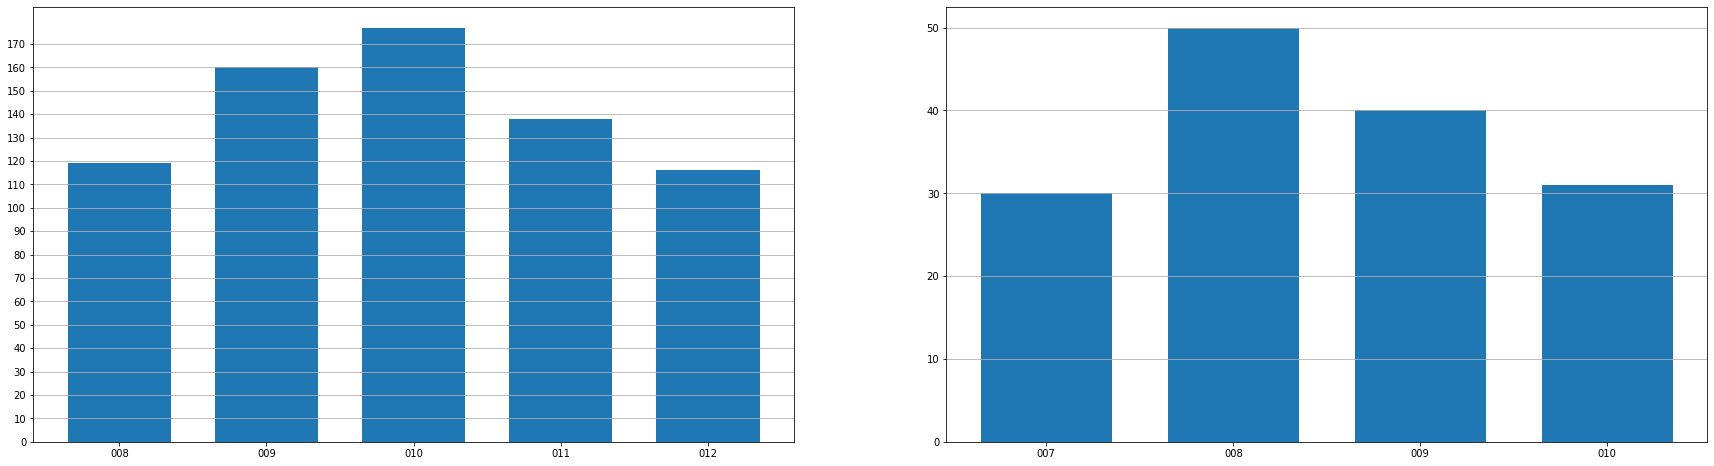

In [495]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,8))

ax1.bar(list(some_dict.keys()), [int(f) for f in some_dict.values()], 0.7)
ax1.grid(axis = 'y')
ax1.set_yticks(np.arange(0, max(some_dict.values())+1, 10))

ax2.bar(list(some_dict_val.keys()), [int(f) for f in some_dict_val.values()], 0.7)
ax2.grid(axis = 'y')
ax2.set_yticks(np.arange(0, max(some_dict_val.values())+1, 10)) 

fig.show()

In [0]:
comp_val = {}

for frame_num_uniq_val in sorted(set(frame_nums_val_uniq)):
  comp_val[frame_num_uniq_val] = {}
  comp_val[frame_num_uniq_val]['class'] = []
  comp_val[frame_num_uniq_val]['person'] = []
  comp_val[frame_num_uniq_val]['video_names'] = []
  comp_val[frame_num_uniq_val]['videos_count'] = 0
  for vid_name_val, frames_num_val in list(vids_and_frames_val.items()):
    if frames_num_val == frame_num_uniq_val:
      if vid_name_val.split('_')[0] not in comp_val[frame_num_uniq_val]['class']:
        comp_val[frame_num_uniq_val]['class'].append(vid_name_val.split('_')[0])
      if vid_name_val.split('_')[1] not in comp_val[frame_num_uniq_val]['person']:
        comp_val[frame_num_uniq_val]['person'].append(vid_name_val.split('_')[1])
      if vid_name_val not in comp_val[frame_num_uniq_val]['video_names']:
        comp_val[frame_num_uniq_val]['video_names'].append(vid_name_val)
        comp_val[frame_num_uniq_val]['videos_count'] += 1

In [0]:
damn = [f for f in some_dict_val.keys() if some_dict_val[f] < 30]

for key in comp_val.keys():
  if key in damn:
    print(key, sorted(comp_val[key]['person']))

In [0]:
comp = {}

for frame_num_uniq in sorted(set(frame_nums_uniq)):
  comp[frame_num_uniq] = {}
  comp[frame_num_uniq]['class'] = []
  comp[frame_num_uniq]['person'] = []
  comp[frame_num_uniq]['video_names'] = []
  comp[frame_num_uniq]['videos_count'] = 0
  for vid_name, frames_num in list(vids_and_frames.items()):
    if frames_num == frame_num_uniq:
      if vid_name.split('_')[0] not in comp[frame_num_uniq]['class']:
        comp[frame_num_uniq]['class'].append(vid_name.split('_')[0])
      if vid_name.split('_')[1] not in comp[frame_num_uniq]['person']:
        comp[frame_num_uniq]['person'].append(vid_name.split('_')[1])
      if vid_name not in comp[frame_num_uniq]['video_names']:
        comp[frame_num_uniq]['video_names'].append(vid_name)
        comp[frame_num_uniq]['videos_count'] += 1

In [501]:
maxer = 0
maxer_key = 0

for key in some_dict:
  if some_dict[key] >= maxer:
    maxer = some_dict[key]
    maxer_key = key

print(maxer_key, maxer)

010 177


In [502]:
list(range(int(maxer_key)-1, int(maxer_key)+3))

[9, 10, 11, 12]

In [503]:
abnormal_vids_count = 0

for key in some_dict.keys():
  if int(key) not in range(int(maxer_key)-2, int(maxer_key)+3):
    abnormal_vids_count += some_dict[key]

abnormal_vids_count

0

In [504]:
normal_vids_count = 0

for key in some_dict.keys():
  if int(key) in range(int(maxer_key)-2, int(maxer_key)+3):
    normal_vids_count += some_dict[key]

normal_vids_count

710

In [505]:
abnormal_vids = []

for key in comp:
  for video_name in comp[key]['video_names']:
    if int(key) not in range(int(maxer_key)-2, int(maxer_key)+3):
      abnormal_vids.append(video_name)

abnormal_vids = sorted(abnormal_vids)
len(abnormal_vids)

0

In [415]:
counter = 0
added = 0
matched = []

for classi in list(classes_dict.values()):
  added = 0
  for abnormal_vid in tqdm(abnormal_vids):
    for vid in sorted(glob.glob('data/train/' + classi + '/*.jpg')):
      if abnormal_vid == vid.split('/')[-1].split('.')[0].split('_color')[0]:
        !rm $vid
        matched.append(abnormal_vid)
        counter += 1
        added += 1
  print(classi, counter, '(+' , added, '\b)')

print()
print(len(set(matched)))


  6%|▋         | 25/390 [00:00<00:01, 243.82it/s]

Begin 246 (+ 246 )



  6%|▌         | 24/390 [00:00<00:01, 236.75it/s]

Choose 617 (+ 371 )



  5%|▌         | 21/390 [00:00<00:01, 200.86it/s]

Connection 1340 (+ 723 )



  7%|▋         | 29/390 [00:00<00:01, 287.19it/s]

Navigation 2211 (+ 871 )



  6%|▌         | 23/390 [00:00<00:01, 227.57it/s]

Next 2567 (+ 356 )



  7%|▋         | 27/390 [00:00<00:01, 266.36it/s]

Previous 3032 (+ 465 )



  6%|▋         | 25/390 [00:00<00:01, 244.98it/s]

Start 3274 (+ 242 )



  6%|▌         | 23/390 [00:00<00:01, 224.50it/s]

Stop 3781 (+ 507 )



  7%|▋         | 28/390 [00:00<00:01, 279.39it/s]

Hello 4486 (+ 705 )



100%|██████████| 390/390 [09:53<00:00, 21.78s/it]


Web 4768 (+ 282 )

367


In [417]:
!7z a -t7z train_data.zip /content/data/train -o/content


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive:
  0M Scan  /content/data/                         11 folders, 7072 files, 8613217 bytes (8412 KiB)

Creating archive: train_data.zip

Items to compress: 7083

  0%     16% 1326 + train/Choose/02_M02_04_color_004.jpg                                                 36% 2782 + train/Navigation/04_F02_09_color_004.jpg                                                     57% 4193 + train/Previous/06_F08_06_color_001.jpg                                                  

In [418]:
!ls

data	F05.7z	F09.7z	M02.7z	sample_data
F01.7z	F06.7z	F10.7z	M04.7z	shape_predictor_68_face_landmarks.dat
F02.7z	F07.7z	F11.7z	M07.7z	shape_predictor_68_face_landmarks.dat.bz2
F04.7z	F08.7z	M01.7z	M08.7z	train_data.zip


In [0]:
from google.colab import files

files.download('train_data.zip')

In [507]:
maxer = 0
maxer_key = 0

for key in some_dict_val:
  if some_dict_val[key] >= maxer:
    maxer = some_dict_val[key]
    maxer_key = key

print(maxer_key, maxer)

008 50


In [508]:
list(range(int(maxer_key)-1, int(maxer_key)+3))

[7, 8, 9, 10]

In [509]:
abnormal_vids_count = 0

for key in some_dict_val.keys():
  if int(key) not in range(int(maxer_key)-1, int(maxer_key)+3):
    abnormal_vids_count += some_dict_val[key]

abnormal_vids_count

0

In [510]:
normal_vids_count = 0

for key in some_dict_val.keys():
  if int(key) in range(int(maxer_key)-1, int(maxer_key)+3):
    normal_vids_count += some_dict_val[key]

normal_vids_count

151

In [511]:
abnormal_vids = []

for key in comp_val:
  for video_name in comp_val[key]['video_names']:
    if int(key) not in range(int(maxer_key)-1, int(maxer_key)+3):
      abnormal_vids.append(video_name)

abnormal_vids = sorted(abnormal_vids)
len(abnormal_vids)

0

In [512]:
all_images_val = []

for classi in classes_dict.values():
  for i in sorted(glob.glob('data/validation/' + classi + '/*.jpg')):
    all_images_val.append(i)
  print(len(all_images_val))

117
281
371
439
568
698
865
1023
1167
1280


In [478]:
counter = 0
added = 0
matched = []

for classi in list(classes_dict.values()):
  added = 0
  for abnormal_vid in tqdm(abnormal_vids):
    for vid in sorted(glob.glob('data/validation/' + classi + '/*.jpg')):
      if abnormal_vid == vid.split('/')[-1].split('.')[0].split('_color')[0]:
        !rm $vid
        matched.append(abnormal_vid)
        counter += 1
        added += 1
  print(classi, counter, '(+' , added, '\b)')

print()
print(len(set(matched)))


  0%|          | 0/14 [00:00<?, ?it/s]

Begin 24 (+ 24 )
Choose 24 (+ 0 )
Connection 24 (+ 0 )
Navigation 24 (+ 0 )



  0%|          | 0/14 [00:00<?, ?it/s]

Next 48 (+ 24 )
Previous 48 (+ 0 )
Start 48 (+ 0 )



  0%|          | 0/14 [00:00<?, ?it/s]

Stop 54 (+ 6 )



  0%|          | 0/14 [00:00<?, ?it/s]

Hello 60 (+ 6 )



100%|██████████| 14/14 [00:53<00:00,  9.35s/it]


Web 84 (+ 24 )

14


In [479]:
!7z a -t7z val_data2.zip /content/data/validation -o/content


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive:
  0M Scan  /content/data/                         11 folders, 1280 files, 1452304 bytes (1419 KiB)

Creating archive: val_data2.zip

Items to compress: 1291

  0%    
Files read from disk: 1280
Archive size: 660754 bytes (646 KiB)
Everything is Ok


In [480]:
!ls

data	F09.7z	sample_data
F01.7z	F10.7z	shape_predictor_68_face_landmarks.dat
F02.7z	F11.7z	shape_predictor_68_face_landmarks.dat.bz2
F04.7z	M01.7z	train_data.zip
F05.7z	M02.7z	val_data2.zip
F06.7z	M04.7z	val_data.zip
F07.7z	M07.7z
F08.7z	M08.7z


In [0]:
files.download('val_data2.zip')

In [514]:
print(max(vids_and_frames.values()))
print(max(vids_and_frames_val.values()))

012
010


In [0]:
target_frame_num = int(max(vids_and_frames.values())) #12

for classi in classes_dict.keys():
  for vid in vids_and_frames.keys():
    if classi == vid.split('_')[0]:
      if int(vids_and_frames[vid]) < target_frame_num:
        #print('\n', vid, vids_and_frames[vid])
        for i in range(1, (target_frame_num - int(vids_and_frames[vid]) + 1)):
          #print('saving', ('data/train/' + classes_dict[classi] + '/' + vid + '_' + 'color' + '_' + str(int(vids_and_frames[vid]) + i).zfill(3) + '.jpg'))
          plt.imsave('data/train/' + classes_dict[classi] + '/' + vid + '_' + 'color' + '_' + str(int(vids_and_frames[vid]) + i).zfill(3) + '.jpg', img_black)
  #print('*******************************************')

In [516]:
all_images_padded = []

for classi in classes_dict.values():
  for i in sorted(glob.glob('data/train/' + classi + '/*.jpg')):
    all_images_padded.append(i)
  print(len(all_images_padded))

804
1776
2460
3108
3972
4920
6012
6864
7560
8520


In [0]:
target_frame_num_val = int(max(vids_and_frames_val.values())) # 10, но вжарим 22 на всякий

for classi in classes_dict.keys():
  for vid in vids_and_frames_val.keys():
    if classi == vid.split('_')[0]:
      if int(vids_and_frames_val[vid]) < target_frame_num_val:
        #print('\n', vid, vids_and_frames_val[vid])
        for i in range(1, (target_frame_num_val - int(vids_and_frames_val[vid]) + 1)):
          #print('saving', ('data/validation/' + classes_dict[classi] + '/' + vid + '_' + 'color' + '_' + str(int(vids_and_frames_val[vid]) + i).zfill(3) + '.jpg'))
          plt.imsave('data/validation/' + classes_dict[classi] + '/' + vid + '_' + 'color' + '_' + str(int(vids_and_frames_val[vid]) + i).zfill(3) + '.jpg', img_black)
  #print('*******************************************')

In [518]:
all_images_padded_val = []

for classi in classes_dict.values():
  for i in sorted(glob.glob('data/validation/' + classi + '/*.jpg')):
    all_images_padded_val.append(i)
  print(len(all_images_padded_val))

150
340
440
510
660
810
1010
1200
1380
1510


In [519]:
train_image = []
train_class = []

for class_id in tqdm(range(len(classes))):
    images = sorted(glob.glob('data/train/' + classes[class_id] + '/*.jpg'))
    for i in range(len(images)):
        if ('noised' in images[i] or 'rand_contr' in images[i]
        or 'vert_flip' in images[i] or 'hor_flip' in images[i]):
            train_image.append(images[i].split('/')[3])
            train_class.append(classes_dict[images[i].split('/')[3].split(']')[-1][:2]])
        else:
            train_image.append(images[i].split('/')[3])
            train_class.append(classes_dict[images[i].split('/')[3].split('_')[0]])
        
train_data = pd.DataFrame()
train_data['image'] = train_image
train_data['class'] = train_class

train_data.to_csv('data/miracl/train_new.csv',header=True, index=False)


100%|██████████| 10/10 [00:00<00:00, 237.15it/s]

In [520]:
train = pd.read_csv('data/miracl/train_new.csv')
train.head()

,image,class
0,01_F01_01_color_001.jpg,Begin
1,01_F01_01_color_002.jpg,Begin
2,01_F01_01_color_003.jpg,Begin
3,01_F01_01_color_004.jpg,Begin
4,01_F01_01_color_005.jpg,Begin


In [521]:
train.tail()

,image,class
8515,10_M04_10_color_008.jpg,Web
8516,10_M04_10_color_009.jpg,Web
8517,10_M04_10_color_010.jpg,Web
8518,10_M04_10_color_011.jpg,Web
8519,10_M04_10_color_012.jpg,Web


In [522]:
len(train)

8520

In [0]:
y_tr = train['class']
y_tr_dummy = pd.get_dummies(y_tr)

In [524]:
val_image = []
val_class = []

for class_id in tqdm(range(len(classes))):
    images = sorted(glob.glob('data/validation/' + classes[class_id] + '/*.jpg'))
    for i in range(len(images)):
        val_image.append(images[i].split('/')[3])
        val_class.append(classes_dict[images[i].split('/')[3].split('_')[0]])
val_data = pd.DataFrame()
val_data['image'] = val_image
val_data['class'] = val_class

val_data.to_csv('data/miracl/val_new.csv',header=True, index=False)


100%|██████████| 10/10 [00:00<00:00, 1392.30it/s]

In [525]:
val = pd.read_csv('data/miracl/val_new.csv')
val.head()

,image,class
0,01_F10_01_color_001.jpg,Begin
1,01_F10_01_color_002.jpg,Begin
2,01_F10_01_color_003.jpg,Begin
3,01_F10_01_color_004.jpg,Begin
4,01_F10_01_color_005.jpg,Begin


In [526]:
val.tail()

,image,class
1505,10_M07_10_color_006.jpg,Web
1506,10_M07_10_color_007.jpg,Web
1507,10_M07_10_color_008.jpg,Web
1508,10_M07_10_color_009.jpg,Web
1509,10_M07_10_color_010.jpg,Web


In [527]:
len(val)

1510

In [0]:
y_val = val['class']
y_val_dummy = pd.get_dummies(y_val)

In [529]:
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5



In [0]:
from keras.models import Model

In [665]:
video = Input(shape=(22, 50, 100, 3))

cnn_base = MobileNetV2(input_shape=(50, 100, 3), include_top=False)
cnn_out = GlobalAveragePooling2D()(cnn_base.output)

cnn = Model(input=cnn_base.input, output=cnn_out)
encoded_frames = TimeDistributed(cnn)(video)

encoded_sequence = LSTM(54)(encoded_frames)
outputs = Dense(10, activation="softmax")(encoded_sequence)

model = Model([video], outputs)

/usr/local/lib/python3.6/dist-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("gl...)`
  


In [666]:
adam2 = optimizers.Adam(lr=0.0001)
save_weights = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model.compile(loss='categorical_crossentropy',optimizer=adam2,metrics=['accuracy'])
model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 22, 50, 100, 3)    0         
_________________________________________________________________
time_distributed_46 (TimeDis (None, 22, 1280)          2257984   
_________________________________________________________________
lstm_25 (LSTM)               (None, 54)                288360    
_________________________________________________________________
dense_47 (Dense)             (None, 10)                550       
Total params: 2,546,894
Trainable params: 2,512,782
Non-trainable params: 34,112
_________________________________________________________________


In [1]:
history = model.fit_generator(train_data, epochs=20, steps_per_epoch=194, 
                              validation_data=val_data, validation_steps=35, shuffle=False)

NameError: ignored

In [532]:
!wget https://gist.githubusercontent.com/Emadeldeen-24/736c33ac2af0c00cc48810ad62e1f54a/raw/f2428c9ba7c13e08e2aa9b2d5ff64ad575a99dd8/tweaked_ImageGenerator_v2.py

--2020-02-09 05:21:16--  https://gist.githubusercontent.com/Emadeldeen-24/736c33ac2af0c00cc48810ad62e1f54a/raw/f2428c9ba7c13e08e2aa9b2d5ff64ad575a99dd8/tweaked_ImageGenerator_v2.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45797 (45K) [text/plain]
Saving to: ‘tweaked_ImageGenerator_v2.py’

tweaked_ImageGenera 100%[===================>]  44.72K  --.-KB/s    in 0.01s   

2020-02-09 05:21:17 (3.16 MB/s) - ‘tweaked_ImageGenerator_v2.py’ saved [45797/45797]



In [0]:
from tweaked_ImageGenerator_v2 import ImageDataGenerator

In [662]:
datagen = ImageDataGenerator()
train_data = datagen.flow_from_directory('data/train', target_size=(50, 100), batch_size=2, frames_per_step=22, shuffle=False)

Found 8520 images belonging to 10 classes.


In [663]:
val_data = datagen.flow_from_directory('data/validation', target_size=(50, 100), batch_size=2, frames_per_step=22, shuffle=False)

Found 1510 images belonging to 10 classes.


In [664]:
import math

print(math.ceil(8520/(2*22)))
print(math.ceil((1510/(2*22))))

194
35


In [0]:
model_small = Sequential()

model_small.add(ZeroPadding3D(padding=(1, 2, 2), input_shape=(22, 50, 100, 3)))
model_small.add(Conv3D(32, (3, 5, 5), strides=(1, 2, 2), activation='relu'))
model_small.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model_small.add(Dropout(.3))

model_small.add(ZeroPadding3D(padding=(1, 2, 2)))
model_small.add(Conv3D(64, (3, 5, 5), strides=(1, 1, 1), activation='relu'))
model_small.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model_small.add(Dropout(.3))

model_small.add(ZeroPadding3D(padding=(1, 1, 1)))
model_small.add(Conv3D(96, (3, 3, 3), strides=(1, 2, 2), activation='relu'))
model_small.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model_small.add(Dropout(.3))

model_small.add(TimeDistributed(Flatten()))

#model_small.add(Bidirectional(GRU(256, activation='relu', return_sequences=True)))
#model_small.add(Bidirectional(GRU(256, activation='relu', return_sequences=False)))
model_small.add(Bidirectional(LSTM(256, activation='relu', return_sequences=False)))

model_small.add(Dense(10, activation='softmax'))

In [0]:
model_small = Sequential()

model_small.add(ZeroPadding3D(padding=(1, 2, 2), input_shape=(22, 50, 100, 3)))
model_small.add(Conv3D(16, (3, 5, 5), strides=(1, 2, 2), activation='relu'))
model_small.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model_small.add(Dropout(.3))

model_small.add(ZeroPadding3D(padding=(1, 2, 2)))
model_small.add(Conv3D(32, (3, 5, 5), strides=(1, 1, 1), activation='relu'))
model_small.add(MaxPooling3D(pool_size=(1, 2, 2), strides=(1, 2, 2)))
model_small.add(Dropout(.3))

model_small.add(TimeDistributed(Flatten()))

model_small.add((GRU(22, activation='relu', return_sequences=False)))

model_small.add(Dense(10, activation='softmax'))

In [655]:
from keras.callbacks import ModelCheckpoint
adam2 = optimizers.Adam(lr=0.0001)
save_weights = ModelCheckpoint('weight.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model_small.compile(loss='categorical_crossentropy',optimizer=adam2,metrics=['accuracy'])
model_small.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding3d_107 (ZeroPadd (None, 24, 54, 104, 3)    0         
_________________________________________________________________
conv3d_107 (Conv3D)          (None, 22, 25, 50, 16)    3616      
_________________________________________________________________
max_pooling3d_66 (MaxPooling (None, 22, 12, 25, 16)    0         
_________________________________________________________________
dropout_102 (Dropout)        (None, 22, 12, 25, 16)    0         
_________________________________________________________________
zero_padding3d_108 (ZeroPadd (None, 24, 16, 29, 16)    0         
_________________________________________________________________
conv3d_108 (Conv3D)          (None, 22, 12, 25, 32)    38432     
_________________________________________________________________
max_pooling3d_67 (MaxPooling (None, 22, 6, 12, 32)   

In [656]:
history = model_small.fit_generator(train_data, epochs=20, steps_per_epoch=130, 
                              validation_data=val_data, validation_steps=23, shuffle=False)

Epoch 1/20
130/130 [==============================] - 38s 289ms/step - loss: 2.7570 - acc: 0.1060 - val_loss: 2.6858 - val_acc: 0.0874
Epoch 2/20
130/130 [==============================] - 23s 175ms/step - loss: 2.7965 - acc: 0.1167 - val_loss: 2.7155 - val_acc: 0.0887
Epoch 3/20
130/130 [==============================] - 23s 174ms/step - loss: 2.7646 - acc: 0.1186 - val_loss: 2.7612 - val_acc: 0.0854
Epoch 4/20
130/130 [==============================] - 23s 174ms/step - loss: 2.7587 - acc: 0.1192 - val_loss: 2.7183 - val_acc: 0.0894
Epoch 5/20
130/130 [==============================] - 23s 173ms/step - loss: 2.7607 - acc: 0.1196 - val_loss: 2.7181 - val_acc: 0.0894
Epoch 6/20
130/130 [==============================] - 23s 175ms/step - loss: 2.7624 - acc: 0.1194 - val_loss: 2.7179 - val_acc: 0.0894
Epoch 7/20
130/130 [==============================] - 22s 173ms/step - loss: 2.7579 - acc: 0.1059 - val_loss: 2.7177 - val_acc: 0.1325
Epoch 8/20
130/130 [==============================] - 2

KeyboardInterrupt: ignored

In [0]:
history = model_small.fit_generator(train_data, epochs=20, steps_per_epoch=130, 
                              validation_data=val_data, validation_steps=23, 
                              callbacks=[save_weights], shuffle=True)